# CUBIC REGRESSION MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

trn_d= pd.read_csv('trainRegression.csv')
trn_d.head()

,X,R
0,0.01,-0.2730
1,0.02,-0.1170
2,0.03,-0.3090
3,0.04,0.0306
4,0.05,-0.0802


In [2]:
trnx= np.array(trn_d['X']) 
trny= np.array(trn_d['R'])

In [3]:
A=np.array([[len(trnx),sum(trnx),sum(trnx**2),sum(trnx**3)],[sum(trnx),sum(trnx**2),sum(trnx**3),sum(trnx**4)],[sum(trnx**2),sum(trnx**3),sum(trnx**4),sum(trnx**5)],[sum(trnx**3),sum(trnx**4),sum(trnx**5),sum(trnx**6)]])
A

array([[  283.        ,   444.95      ,   932.7465    ,  2199.781025  ],
       [  444.95      ,   932.7465    ,  2199.781025  ,  5533.85257677],
       [  932.7465    ,  2199.781025  ,  5533.85257677, 14501.33829628],
       [ 2199.781025  ,  5533.85257677, 14501.33829628, 39086.48841058]])

In [4]:
B=np.array([[sum(trny)],[sum(trnx*trny)],[sum(trny*(trnx**2))],[sum(trny*(trnx**3))]])
B

array([[   1.39087   ],
       [-126.6414295 ],
       [-378.87568955],
       [-952.32410353]])

In [5]:
A_inverse=np.linalg.inv(A)
A_inverse

array([[ 0.05664436, -0.13513534,  0.08595689, -0.01594607],
       [-0.13513534,  0.4295675 , -0.30731072,  0.06080162],
       [ 0.08595689, -0.30731072,  0.23448106, -0.04832266],
       [-0.01594607,  0.06080162, -0.04832266,  0.01024277]])

In [6]:
i=np.dot(A_inverse,B)
i

array([[-0.18862637],
       [ 3.94071895],
       [-3.78251095],
       [ 0.83166145]])

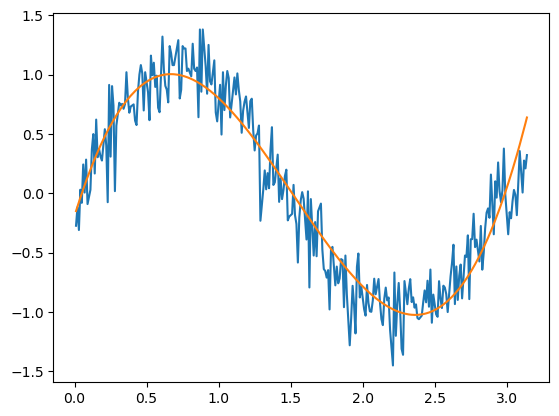

In [7]:
Predtrn=i[0]+i[1]*trnx+i[2]*(trnx**2)+i[3]*(trnx**3)
plt.plot(trnx,trny)
plt.plot(trnx,Predtrn)

In [8]:
#MSR FOR TRAINING DATA
sum(np.square(trny-Predtrn))/len(trnx)

0.04966025536221572

In [9]:
tst_d= pd.read_csv('testRegression.csv')
tstx=tst_d['X']
tsty=tst_d['R']

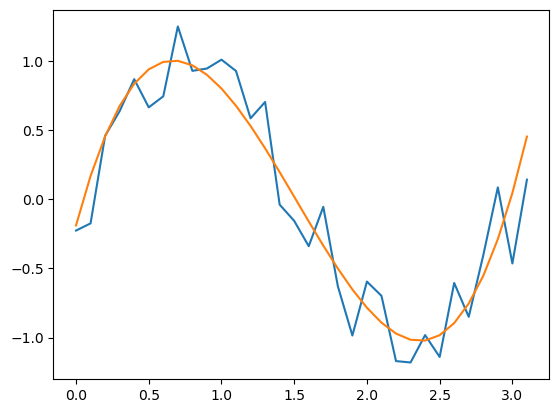

In [10]:
Predtst= i[0]+i[1]*tstx+i[2]*(tstx**2)+i[3]*(tstx**3)
plt.plot(tstx,tsty)
plt.plot(tstx,Predtst)

In [11]:
#MSR FOR TESTING DATA
sum(np.square((tsty)-(Predtst)))/len(tstx)

0.051542057690949716